# PCA on High-Level Dimensions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display
import analysis_utils as au

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')

In [10]:
try:
    df_raw = pd.read_csv('./data/super_experiment_design_space.csv')
    print(f"Successfully loaded raw dataset. Shape: {df_raw.shape}")
except FileNotFoundError:
    print("Error: './data/super_experiment_design_space.csv' not found.")

df_pca_features, numerical_cols, categorical_cols, df_processed = au.preprocess_for_pca(df_raw)
print("\nPreprocessing complete.")
display(df_pca_features.head())

Successfully loaded raw dataset. Shape: (162, 16)

Preprocessing complete.


,Number of Tasks,SOA_is_NA,SOA,CSI,RSI,Switch Rate,Task 1 Difficulty,Task 2 Difficulty,Stimulus_Valency_Mapped,Response_Set_Overlap_Mapped,Stimulus_Response_Mapping_Mapped,Task_Cue_Type_Mapped
0,2,0,500.0,0,1000.0,0.0,0.0,0.0,SBC_Univalent,RSO_Identical,SRM_Arbitrary,TCT_Implicit
1,2,0,1000.0,0,1000.0,0.0,0.0,0.0,SBC_Univalent,RSO_Identical,SRM_Arbitrary,TCT_Implicit
2,2,0,2000.0,0,1000.0,0.0,0.0,0.0,SBC_Univalent,RSO_Identical,SRM_Arbitrary,TCT_Implicit
3,2,0,4000.0,0,1000.0,0.0,0.0,0.0,SBC_Univalent,RSO_Identical,SRM_Arbitrary,TCT_Implicit
4,2,0,1000.0,0,1000.0,0.0,0.5,0.5,SBC_Univalent,RSO_Identical,SRM_Arbitrary,TCT_Implicit


In [11]:
pipeline = au.create_pca_pipeline(numerical_cols, categorical_cols)
pipeline.fit(df_pca_features)

print("PCA pipeline fitted successfully.")

PCA pipeline fitted successfully.


In [12]:
pca = pipeline.named_steps['pca']
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("\n--- Explained Variance ---")
for i, (var, cum_var) in enumerate(zip(explained_variance, cumulative_variance)):
    if cum_var > 0.95: break
    print(f"PC{i+1}: Explained Variance = {var:.3f}, Cumulative Variance = {cum_var:.3f}")
    
loadings = au.get_component_loadings(pipeline, numerical_cols, categorical_cols)
print("\n--- Principal Component Loadings ---")
display(loadings.round(3))


--- Explained Variance ---
PC1: Explained Variance = 0.235, Cumulative Variance = 0.235
PC2: Explained Variance = 0.189, Cumulative Variance = 0.424
PC3: Explained Variance = 0.138, Cumulative Variance = 0.562
PC4: Explained Variance = 0.107, Cumulative Variance = 0.670
PC5: Explained Variance = 0.100, Cumulative Variance = 0.770
PC6: Explained Variance = 0.073, Cumulative Variance = 0.843
PC7: Explained Variance = 0.042, Cumulative Variance = 0.885
PC8: Explained Variance = 0.030, Cumulative Variance = 0.915
PC9: Explained Variance = 0.027, Cumulative Variance = 0.941

--- Principal Component Loadings ---


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
Number of Tasks,0.339,0.545,0.110,0.076,-0.157,-0.329,-0.268,-0.155,-0.099,0.160,-0.361,0.306,0.058,0.274,0.007,-0.048,0.029,-0.000,0.000,-0.000
SOA_is_NA,0.200,0.017,0.693,-0.252,-0.251,-0.100,0.542,0.183,0.019,-0.081,0.021,-0.073,0.021,0.042,-0.013,0.026,0.015,0.000,-0.000,-0.000
SOA,0.202,0.428,-0.094,0.478,0.163,0.569,0.396,0.084,-0.006,0.067,0.038,-0.069,0.071,0.090,-0.005,0.003,-0.005,-0.000,0.000,-0.000
CSI,0.165,-0.378,0.091,0.612,0.282,-0.496,0.201,-0.069,-0.088,0.147,-0.052,-0.016,0.065,-0.083,-0.034,0.178,0.001,0.000,-0.000,0.000
RSI,-0.214,-0.126,0.625,0.370,-0.098,0.341,-0.514,0.023,0.002,0.077,0.082,0.085,-0.002,-0.004,-0.016,0.000,-0.010,0.000,0.000,0.000
Switch Rate,0.367,-0.502,-0.009,-0.209,0.174,0.400,0.040,-0.058,0.029,0.096,-0.458,0.372,-0.009,0.122,0.005,-0.016,0.030,0.000,0.000,-0.000
Task 1 Difficulty,-0.015,0.254,0.264,-0.240,0.851,-0.082,-0.136,0.135,0.140,-0.104,-0.004,-0.019,-0.070,-0.042,0.034,0.037,-0.031,-0.000,-0.000,0.000
Task 2 Difficulty,0.634,-0.056,-0.028,-0.065,-0.036,0.044,-0.319,0.051,0.059,0.010,0.273,-0.376,0.122,-0.170,0.037,0.038,0.465,0.000,0.000,0.000
Stimulus_Valency_Mapped_SBC_Bivalent_Congruent,-0.075,0.008,0.019,0.017,0.016,0.012,-0.012,-0.069,0.005,-0.366,-0.166,0.028,0.768,-0.170,0.026,-0.083,-0.025,0.412,-0.172,0.023
Stimulus_Valency_Mapped_SBC_Bivalent_Incongruent,-0.064,0.019,0.001,-0.044,-0.043,-0.041,0.054,-0.050,0.647,0.597,0.011,-0.068,0.003,-0.027,0.020,-0.058,-0.039,0.412,-0.172,0.023


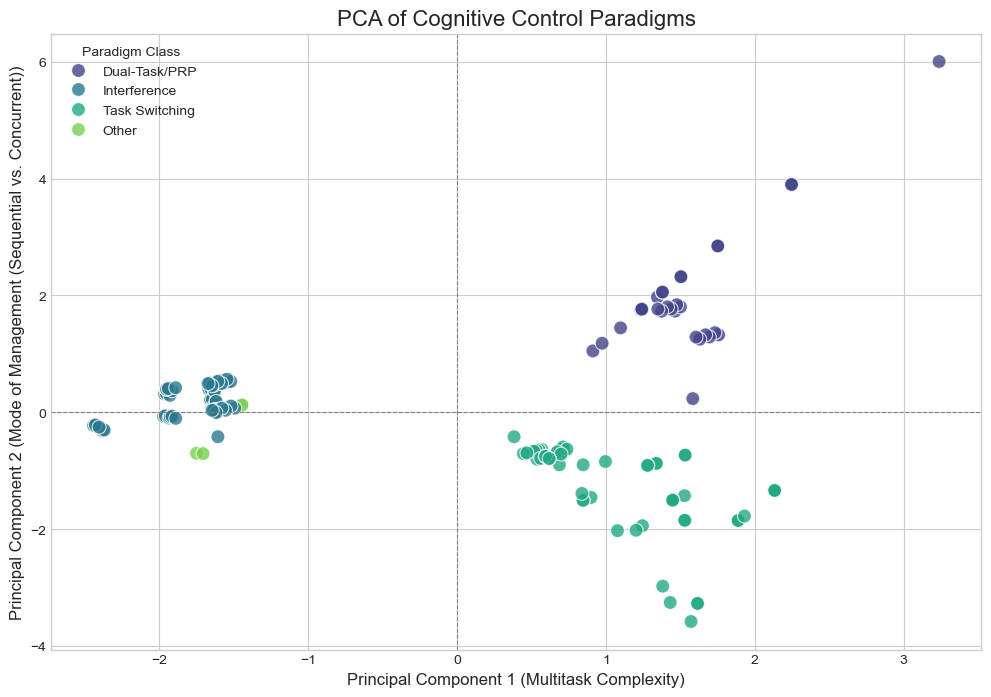

In [23]:
pca_results = pipeline.transform(df_pca_features)
pca_df = pd.DataFrame(pca_results, columns=[f'PC{i+1}' for i in range(pca_results.shape[1])])
pca_df['Paradigm'] = df_processed['Paradigm'].values

fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(
data=pca_df, x='PC1', y='PC2', hue='Paradigm',
palette='viridis', alpha=0.8, s=100, ax=ax
)
ax.set_title('PCA of Cognitive Control Paradigms', fontsize=16)
ax.set_xlabel('Principal Component 1 (Multitask Complexity)', fontsize=12)
ax.set_ylabel('Principal Component 2 (Mode of Management (Sequential vs. Concurrent))', fontsize=12)
ax.axhline(0, color='grey', linestyle='--', linewidth=0.8)
ax.axvline(0, color='grey', linestyle='--', linewidth=0.8)
plt.legend(title='Paradigm Class')
"""sigman_and_dehaene = pca_df.iloc[161]
ax.text(
    x=sigman_and_dehaene['PC1'] + 0.05, # x-coordinate
    y=sigman_and_dehaene['PC2'] + 0.05, # y-coordinate
    s='Sigman and Dehaene (2006)',             # The text to display
    fontdict={'weight': 'bold', 'size': 10}
)
ax.scatter(sigman_and_dehaene['PC1'], sigman_and_dehaene['PC2'], facecolors='none', edgecolors='red', s=200, linewidths=1.5)"""
plt.savefig("fig2.png")
plt.show()

In [25]:
centroids = au.find_centroids(pca_df, paradigm_col='Paradigm')

print("\n--- Cluster Centroids in PC Space ---")
for paradigm, data in centroids.items():
    print(f"\n{paradigm}:")
    print(pd.Series(data).round(2))

ts_centroid = centroids['Task Switching']
dt_centroid = centroids['Dual-Task/PRP']
int_centroid = centroids['Interference']

dual_task_interference_interpolated_pc = au.interpolate_centroids(dt_centroid, int_centroid, alpha=0.5)
print("\nCalculated midpoint between dual-task/PRP and interference in PC space:", dual_task_interference_interpolated_pc.round(2))

task_switching_dual_task_interpolated_pc = au.interpolate_centroids(ts_centroid, dt_centroid, alpha=0.5)
print("\nCalculated midpoint between task switching and dual-task/PRP in PC space:", task_switching_dual_task_interpolated_pc.round(2))

task_switching_interference_interpolated_pc = au.interpolate_centroids(ts_centroid, int_centroid, alpha=0.5)
print("\nCalculated midpoint between task-switching and interference in PC space:", task_switching_interference_interpolated_pc.round(2))


--- Cluster Centroids in PC Space ---

Dual-Task/PRP:
PC1     1.53
PC2     1.97
PC3     0.29
PC4     0.16
PC5    -0.30
PC6    -0.46
PC7    -0.21
PC8    -0.09
PC9    -0.05
PC10    0.05
PC11   -0.09
PC12    0.06
PC13    0.01
PC14    0.03
PC15    0.00
PC16   -0.00
PC17    0.00
PC18    0.00
PC19   -0.00
PC20    0.00
dtype: float64

Interference:
PC1    -1.75
PC2     0.20
PC3     0.00
PC4    -0.00
PC5     0.23
PC6    -0.05
PC7     0.11
PC8     0.01
PC9     0.01
PC10    0.03
PC11   -0.03
PC12    0.03
PC13    0.03
PC14    0.02
PC15   -0.00
PC16   -0.00
PC17    0.00
PC18    0.00
PC19   -0.00
PC20    0.00
dtype: float64

Other:
PC1    -1.59
PC2    -0.29
PC3     1.16
PC4     0.66
PC5    -1.78
PC6     0.48
PC7     0.47
PC8    -0.65
PC9    -0.39
PC10   -0.27
PC11   -0.01
PC12    0.06
PC13   -0.52
PC14   -0.26
PC15    0.08
PC16    0.06
PC17    0.09
PC18    0.00
PC19   -0.00
PC20    0.00
dtype: float64

Task Switching:
PC1     1.03
PC2    -1.21
PC3    -0.23
PC4    -0.12
PC5     0.04
PC6     0.26
PC

### Dimensions for Interpolation Between Dual-Task/PRP and Interference

In [32]:
new_paradigm_interpolating_dual_task_and_interference_params = au.inverse_transform_point(dual_task_interference_interpolated_pc, pipeline)
print("\n--- Derived Parameters for a Novel 'Hybrid' Paradigm Between Dual-Task/PRP and Interference Paradigms ---")
display(new_paradigm_interpolating_dual_task_and_interference_params.round(2))


--- Derived Parameters for a Novel 'Hybrid' Paradigm Between Dual-Task/PRP and Interference Paradigms ---


Number of Tasks                               1.5
SOA_is_NA                                0.206012
SOA                                    808.895406
CSI                                           0.0
RSI                                   1353.326002
Switch Rate                              0.757576
Task 1 Difficulty                        2.534824
Task 2 Difficulty                        -0.19697
Stimulus_Valency_Mapped             SBC_Univalent
Response_Set_Overlap_Mapped                RSO_NA
Stimulus_Response_Mapping_Mapped    SRM_Arbitrary
Task_Cue_Type_Mapped                 TCT_Implicit
dtype: object

#### Interpretation of Interpolation Between Dual-Task/PRP and Interference
This interpretation takes advantage of the overloading of the SOA dimension which can describe temporal offset between stimuli in PRP tasks (the standard interpretation of SOA) but also the temporal offset between target stimulus and distractor stimulus in interference tasks.

Between dual-task/PRP and interference, the interpolation gives us an interference task where the distractor appears quite a bit later than the target stimulus. It seems to be probing what the temporal window is for interference. There is the Kopp et al. (1996) paper that presents a distractor shortly before the target stimulus, but besides this, most interference tasks present distractors simultaneously with the target stimulus. Because PRP experiments often manipulate the SOA, those experimental conditions have non-zero SOAs and the interpolation thus gives us a significant non-zero SOA. 

### Dimensions for Interpolation Between Task-Switching and Dual-Task/PRP

In [29]:
new_paradigm_interpolating_task_switching_and_dual_task_params = au.inverse_transform_point(task_switching_dual_task_interpolated_pc, pipeline)
print("\n--- Derived Parameters for a Novel 'Hybrid' Paradigm Between Task-Switching and Dual-Task/PRP Paradigms ---")
display(new_paradigm_interpolating_task_switching_and_dual_task_params.round(2))


--- Derived Parameters for a Novel 'Hybrid' Paradigm Between Task-Switching and Dual-Task/PRP Paradigms ---


Number of Tasks                               1.5
SOA_is_NA                                0.277056
SOA                                     819.74026
CSI                                    104.134921
RSI                                    978.998557
Switch Rate                             25.654401
Task 1 Difficulty                        2.375902
Task 2 Difficulty                        2.556999
Stimulus_Valency_Mapped             SBC_Univalent
Response_Set_Overlap_Mapped         RSO_Identical
Stimulus_Response_Mapping_Mapped    SRM_Arbitrary
Task_Cue_Type_Mapped                 TCT_Implicit
dtype: object

#### Interpretation of Interpolation Between Task-Switching and Dual-Task/PRP
This interpolation gives us something similar to the Sigman & Dehaene (2006) paper where task order was not fixed in a dual-task condition. I couldn't find any other papers that did this manipulation of task order. This interpolation gives us a dual-task experiment (task 2 difficulty > 0, RSO != RSO_NA) with a non-zero and significant switch rate. The two tasks would appear in succession with roughly 820ms between the stimulus arrival and a very brief 100ms pre-cue. Because they use identical response sets, there's possibility for response-level crosstalk. 

### Dimensions for Interpolation Between Task-Switching and Interference

In [30]:
new_paradigm_interpolating_task_switching_and_interference_params = au.inverse_transform_point(task_switching_interference_interpolated_pc, pipeline)
print("\n--- Derived Parameters for a Novel 'Hybrid' Paradigm Between Task-Switching and Interference Paradigms ---")
display(new_paradigm_interpolating_task_switching_and_interference_params.round(2))


--- Derived Parameters for a Novel 'Hybrid' Paradigm Between Task-Switching and Interference Paradigms ---


Number of Tasks                                      1.0
SOA_is_NA                                       0.119432
SOA                                             4.393241
CSI                                           104.134921
RSI                                           1532.93062
Switch Rate                                    24.896825
Task 1 Difficulty                               2.365271
Task 2 Difficulty                              -0.246032
Stimulus_Valency_Mapped             SBC_Bivalent_Neutral
Response_Set_Overlap_Mapped                       RSO_NA
Stimulus_Response_Mapping_Mapped           SRM_Arbitrary
Task_Cue_Type_Mapped                        TCT_Implicit
dtype: object

#### Interpretation of Interpolation Between Task-Switching and Interference
This interpolation gives us something similar to the Sigman & Dehaene (2006) paper where task order was not fixed in a dual-task condition. I couldn't find any other papers that did this manipulation of task order. This interpolation gives us a dual-task experiment (task 2 difficulty > 0, RSO != RSO_NA) with a non-zero and significant switch rate. The two tasks would appear in succession with roughly 820ms between the stimulus arrival and a very brief 100ms pre-cue. Because they use identical response sets, there's possibility for response-level crosstalk. 

### Exploratory Data Analysis

In [24]:
try:
    df_raw = pd.read_csv('./data/super_experiment_design_space.csv')
    print("Successfully loaded the dataset.")
    print(f"Original shape: {df_raw.shape}")
except FileNotFoundError:
    print("Error: './data/super_experiment_design_space.csv' not found.")
    exit()

# 2. Perform General Preprocessing
df_cleaned = general_preprocess(df_raw)

print("\n--- Running Stage 2: Exploratory Analysis of Categorical Variables ---")
print("Analyzing value counts to inform PCA feature mapping decisions.")
print("-" * 60)

# List of the original categorical columns we want to inspect
categorical_columns_to_explore = [
    'Response Set Overlap',
    'Stimulus Valency',
    'Stimulus Response Mapping',
    'Task Cue Type'
]

# Loop through the columns and print their value counts
for col in categorical_columns_to_explore:
    print(f"\nValue counts for column: '{col}'")
    # Use dropna=False to explicitly see the count of any missing values (NaNs)
    print(df_cleaned[col].value_counts(dropna=False))
    print("-" * 30)

print("-" * 60)
print("Review the counts above. If a sub-category has very few examples (e.g., < 5-10),")
print("it is generally better to collapse it into a broader category for the PCA.")
print("This analysis should guide the modifications to the mapping functions in Stage 3.")

Successfully loaded the dataset.
Original shape: (161, 16)

--- Running Stage 1: General Preprocessing ---
Cleaned raw data. Imputed missing RSI values with median: 1000.00
General preprocessing complete.

--- Running Stage 2: Exploratory Analysis of Categorical Variables ---
Analyzing value counts to inform PCA feature mapping decisions.
------------------------------------------------------------

Value counts for column: 'Response Set Overlap'
Response Set Overlap
NaN                                    66
Identical                              63
Disjoint - Category (Same Modality)    10
Disjoint - Modality (Standard)          6
Disjoint - Effector                     6
Disjoint - Modality                     5
Disjoint - Modality (Non-Standard)      5
Name: count, dtype: int64
------------------------------

Value counts for column: 'Stimulus Valency'
Stimulus Valency
Bivalent-Neutral                         44
Bivalent-Incongruent                     38
Univalent                  

In [31]:
df_cleaned['Paradigm'] = df_cleaned.apply(classify_paradigm, axis=1)
print("\nClassified paradigms into conceptual groups for visualization.")
df_cleaned[df_cleaned['Paradigm'] == 'Other']


Classified paradigms into conceptual groups for visualization.


,Experiment,Number of Tasks,SOA,CSI,Switch Rate,Stimulus Valency,Response Set Overlap,Stimulus Response Mapping,Task Cue Type,RSI,Task 1 Difficulty,Task 2 Difficulty,Task 1 Type,Task 2 Type,Notes,Super_Experiment_Mapping_Notes,Paradigm
97,Simon (1969) - Toward Block,1,NaN,0,0.0,Univalent,NaN,Compatible,None/Implicit,7000.0,1.0,NaN,Response to Auditory Stimulus Side,NaN,NaN,NaN,Other
98,Simon (1969) - Away Block,1,NaN,0,0.0,Univalent,NaN,Incompatible,None/Implicit,7000.0,1.0,NaN,Response away from Auditory Stimulus Side,NaN,NaN,NaN,Other
99,Schroeter et al. 2002 Stroop - Congruent,1,NaN,0,0.0,Bivalent-Congruent,NaN,Arbitrary,None/Implicit,12000.0,3.0,NaN,Color-Word Matching,NaN,Matching task (Yes/No response). Top row prese...,NaN,Other
100,Schroeter et al. 2002 Stroop - Incongruent,1,NaN,0,0.0,Bivalent-Incongruent,NaN,Arbitrary,None/Implicit,12000.0,3.0,NaN,Color-Word Matching,NaN,Matching task (Yes/No response). Top row prese...,NaN,Other
101,Schroeter et al. 2002 Stroop - Neutral,1,NaN,0,0.0,Bivalent-Neutral,NaN,Arbitrary,None/Implicit,12000.0,3.0,NaN,Matching task (Yes/No response). Top row prese...,NaN,NaN,NaN,Other
